KELOMPOK-1 : TOPIC MODELING KHOTBAH UST. JEROME POWELL (FOMC) 2025
1. 10222081 Ado Murtado
2. Rifa Maulana
3. Salma oktania Dewi

Analisis Topic Modeling pada Transkrip Konferensi Pers FOMC (Federal Open Market Committee) tahun 2025.

Tujuannya adalah untuk menggunakan pemrosesan bahasa alami (NLP) untuk menganalisis serangkaian pidato yang diberikan oleh Ketua The Fed (Ust. Jerome Powell) selama tahun 2025. Dengan menggunakan topic modeling (NMF), kita ingin secara otomatis mengekstrak dan mengidentifikasi tema atau topik ekonomi utama yang menjadi fokus pembahasan The Fed sepanjang tahun tersebut.

Analisis ini membantu kita memahami:

Apa isu ekonomi terpenting di pasar AS selama tahun 2025 (misalnya: inflasi, pasar tenaga kerja, kebijakan moneter).

Bagaimana fokus ini mungkin bergeser dari satu pidato ke pidato berikutnya (misalnya, dari kuartal satu ke kuartal tiga).

2. Penjelasan Setiap Kolomnya
Kita memuat data dari beberapa file .txt dan menyusunnya ke dalam sebuah DataFrame pandas yang kita beri nama df. Berikut adalah penjelasan kolom-kolom dalam DataFrame tersebut:

date (tipe: string):

3. Penjelasan: Tanggal pidato, diekstrak dari nama file. Contoh: '20250129'.

Tujuan: Digunakan sebagai pengenal unik (identifier) untuk setiap dokumen/pidato, yang sangat berguna saat memvisualisasikan hasil (seperti pada plot PCA).

filename (tipe: string):

4. Penjelasan: Nama file asli tempat teks berasal. Contoh: 'FOMCpresconf20250129.txt'.

Tujuan: Untuk referensi dan pelacakan asal data.

text (tipe: string):

5. Penjelasan: Ini adalah kolom data mentah utama kita. Isinya adalah teks lengkap dari satu transkrip konferensi pers, apa adanya, langsung dari file .txt.

Tujuan: Sebagai data input awal sebelum diproses.

Kolom yang Ditambahkan Selama Proses
Selama analisis, kita juga membuat kolom-kolom baru:

length (tipe: integer):

6. Penjelasan: Jumlah total karakter dalam kolom text.

Tujuan: Digunakan pada tahap "Data Understanding" untuk memeriksa panjang rata-rata pidato dan memastikan tidak ada file yang kosong.

processed_text (tipe: string):

7. Penjelasan: Ini adalah versi bersih dari kolom text. Kolom ini telah melalui semua langkah text processing: lowercase, penghapusan tanda baca, penghapusan angka, penghapusan stopwords (termasuk custom stopwords), dan lemmatization.

Tujuan: Ini adalah input akhir yang dimasukkan ke dalam TfidfVectorizer untuk diubah menjadi matriks angka sebelum di-umpan ke model NMF.

LOAD DATA & SETUP KAGGLE.JSON

pastikan upload kaggle.json anda ke google drive untuk google colab.
buat direktori kaggle di root project. gunakan perintah cp karena ini basis nya linux yang artinya copy file dari /!cp /content/drive/MyDrive/Colab-Notebooks/kaggle.json kedlam folder yang udah anda buat tadi yaitu kaggle ~/.kaggle/
lalu atur pemilik nya supaya hanya bisa di akses oleh yang punya folder nya.

JIKA KESUSAHAN SILAHKAN BUKA DOCUMENTASI KAGGLE.

In [118]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab-Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!kaggle datasets list -s "Jerome Powell Press Release Q&A"

ref                                      title                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------  -------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jonathanpaserman/fed-press-release-text  Jerome Powell Press Release Q&A      708307  2025-08-24 21:03:33.393000            170         21  1.0              


In [3]:
!kaggle datasets download -d jonathanpaserman/fed-press-release-text

Dataset URL: https://www.kaggle.com/datasets/jonathanpaserman/fed-press-release-text
License(s): MIT
  0% 0.00/692k [00:00<?, ?B/s]
100% 692k/692k [00:00<00:00, 932MB/s]


In [4]:
!unzip fed-press-release-text.zip

Archive:  fed-press-release-text.zip
  inflating: FOMCpresconf20200916.txt  
  inflating: FOMCpresconf20201105.txt  
  inflating: FOMCpresconf20201216.txt  
  inflating: FOMCpresconf20210127.txt  
  inflating: FOMCpresconf20210317.txt  
  inflating: FOMCpresconf20210428.txt  
  inflating: FOMCpresconf20210616.txt  
  inflating: FOMCpresconf20210728.txt  
  inflating: FOMCpresconf20210922.txt  
  inflating: FOMCpresconf20211103.txt  
  inflating: FOMCpresconf20211215.txt  
  inflating: FOMCpresconf20220126.txt  
  inflating: FOMCpresconf20220316.txt  
  inflating: FOMCpresconf20220504.txt  
  inflating: FOMCpresconf20220615.txt  
  inflating: FOMCpresconf20220727.txt  
  inflating: FOMCpresconf20220921.txt  
  inflating: FOMCpresconf20221102.txt  
  inflating: FOMCpresconf20221214.txt  
  inflating: FOMCpresconf20230201.txt  
  inflating: FOMCpresconf20230322.txt  
  inflating: FOMCpresconf20230503.txt  
  inflating: FOMCpresconf20230614.txt  
  inflating: FOMCpresconf20230726.txt  
  i

Ini adalah data yang di hasilkan dari kaggle. yaitu khotbah Al ustadt Jerome powell tentang kebijakan moneter dan kondisi ekonomi Amerika Serikat.

dibawah ini adalah salah satu txt pidato dalam satu baris

In [5]:
!cat FOMCpresconf20200916.txt

<NAME>CHAIR POWELL</NAME>. Good afternoon. At the Federal Reserve, we are strongly committed to achieving the monetary policy goals that Congress has given us—maximum employment and price stability. Since the beginning of the pandemic, we have taken forceful actions to provide some relief and stability, to ensure that the recovery will be as strong as possible, and to limit lasting damage to the economy. Today my colleagues on the Federal Open Market Committee and I made some important changes to our policy statement, including an update to our guidance for the likely path of our policy interest rate. Guided by our new Statement on Longer-Run Goals and Monetary Policy Strategy that we announced a few weeks ago, these changes clarify our strong commitment over a longer time horizon. Before describing today’s policy actions, let me briefly review recent economic developments. Economic activity has picked up from its depressed second-quarter level, when much of the economy was shut down t

In [7]:
!pip install wordcloud
!pip install nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ditemukan 5 file pidato:
['FOMCpresconf20250129.txt', 'FOMCpresconf20250319.txt', 'FOMCpresconf20250507.txt', 'FOMCpresconf20250618.txt', 'FOMCpresconf20250730.txt']

--- Khotbah Ust. Jerome powell ---
1. Jumlah total file (dokumen): 5
2. Panjang rata-rata setiap pidato: 50090.40 karakter
3. Jumlah pidato duplikat: 0
4. Jumlah file kosong (setelah strip): 0
   Jumlah file setelah hapus duplikat & kosong: 5

Contoh data (DataFrame head):
   date                  filename  \
0  0129  FOMCpresconf20250129.txt   
1  0319  FOMCpresconf20250319.txt   
2  0507  FOMCpresconf20250507.txt   
3  0618  FOMCpresconf20250618.txt   
4  0730  FOMCpresconf20250730.txt   

                                                text  length  
0  <NAME>CHAIR POWELL</NAME>. Good afternoon. My ...   51143  
1  <NAME>CHAIR POWELL</NAME>. Good afternoon. My ...   52381  
2  <NAME>CHAIR POWELL</NAME>. Good afternoon. My ...   48263  
3  <NAME>CHAIR POWELL</NAME>. Good afternoon. My ...   53461  
4  <NAME>CHAIR POWELL

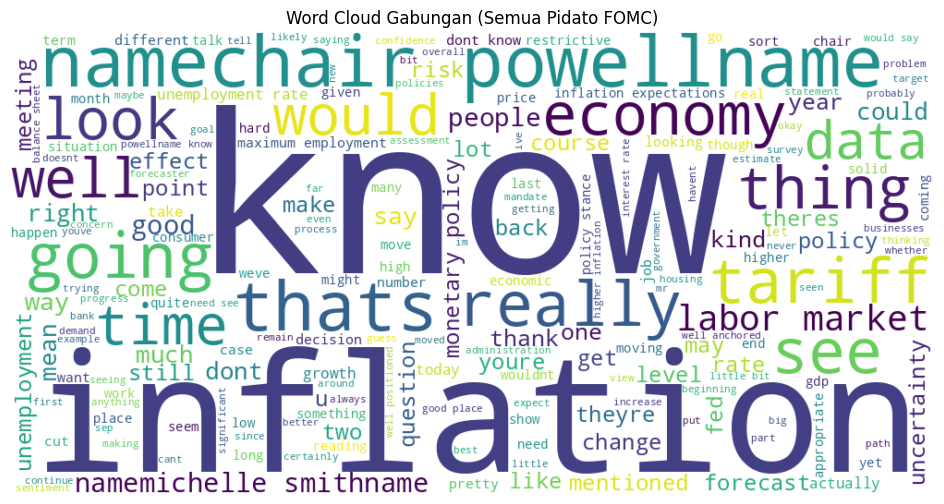

/tmp/ipython-input-3121827401.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=freq_df, palette='viridis')


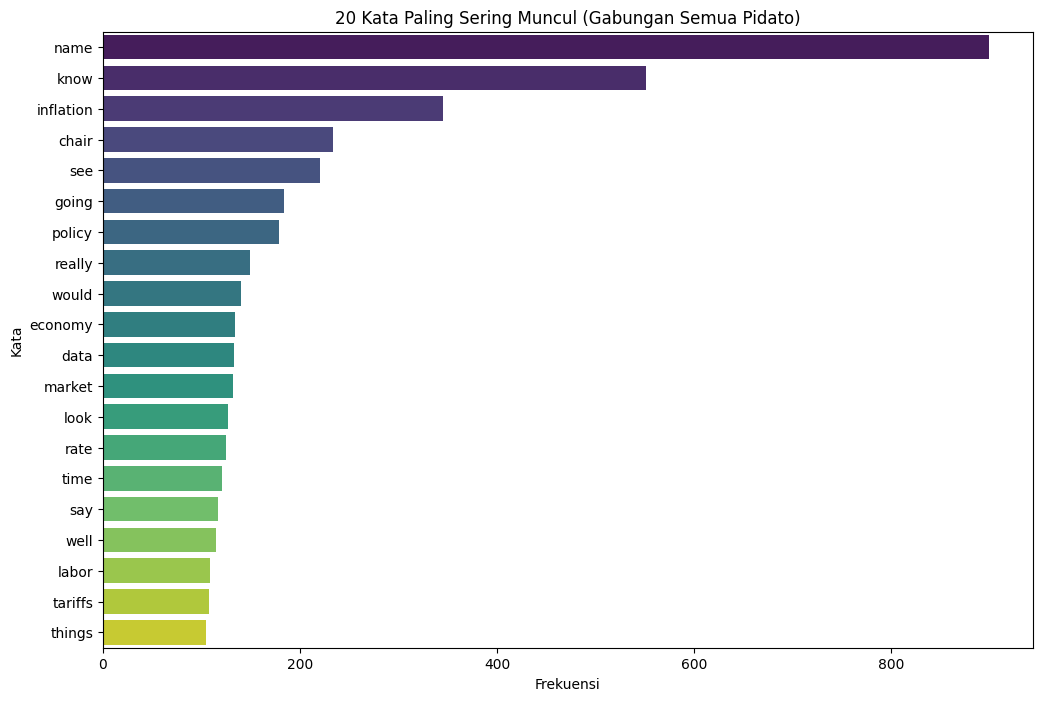

In [111]:
# 1. Data Understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import glob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')


file_pattern = "FOMCpresconf2025*.txt" # file dengan awakan untuk indikator hanya tahun 2025
file_list = glob.glob(file_pattern)
file_list.sort()

if not file_list:
    print(f"ERROR: Tidak ada file yang cocok dengan pola '{file_pattern}'")
    print("Pastikan file .txt Anda ada di direktori yang sama dengan notebook Colab.")
else:
    print(f"Ditemukan {len(file_list)} file pidato:")
    print(file_list)

    all_data = []
    for file_name in file_list:
        with open(file_name, 'r', encoding='utf-8') as f:
            content = f.read()
            date_str = file_name.replace('FOMCpresconf2025', '').replace('.txt', '')
            all_data.append({
                'date': date_str,
                'filename': file_name,
                'text': content
            })


    df = pd.DataFrame(all_data)

    print(f"\n--- Khotbah Ust. Jerome powell ---")

    # 1. Jumlah baris data
    print(f"1. Jumlah total file (dokumen): {len(df)}")

    # 2. Panjang rata-rata setiap baris
    df['length'] = df['text'].apply(len)
    print(f"2. Panjang rata-rata setiap pidato: {df['length'].mean():.2f} karakter")

    # 3. Cek data duplikasi
    duplicates = df.duplicated(subset=['text']).sum()
    print(f"3. Jumlah pidato duplikat: {duplicates}")
    df.drop_duplicates(subset=['text'], inplace=True, keep='first')

    # 4. Cek data kosong
    df['text'] = df['text'].str.strip()
    empty_lines = df[df['text'] == ''].shape[0]
    print(f"4. Jumlah file kosong (setelah strip): {empty_lines}")
    df = df[df['text'] != '']
    print(f"   Jumlah file setelah hapus duplikat & kosong: {len(df)}")

    # Tampilkan 5 baris pertama dari data Anda
    print("\nContoh data (DataFrame head):")
    print(df.head())

    print("\n5. Distribusi Data (Word Cloud & Frekuensi Kata)")

    # 5. Distribusi Data
    full_text_for_viz = ' '.join(df['text'])

    stop_words_en = set(stopwords.words('english'))
    custom_stops = ['federal', 'reserve', 'committee', 'chairman', 'powell', 'percent', 'said', 'also', 'think']
    stop_words_en.update(custom_stops)

    wordcloud_text = ' '.join([word for word in full_text_for_viz.lower().split() if word not in stop_words_en])
    wordcloud_text = re.sub(r'[^a-zA-Z\s]', '', wordcloud_text)

    # a) Word Cloud
    wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=stop_words_en).generate(wordcloud_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud Gabungan (Semua Pidato FOMC)')
    plt.show()

    # b) Bar Chart
    try:
        vec = CountVectorizer(stop_words=list(stop_words_en), max_features=20).fit(df['text'])
        bag_of_words = vec.transform(df['text'])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

        freq_df = pd.DataFrame(words_freq, columns=['Kata', 'Frekuensi'])

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Frekuensi', y='Kata', data=freq_df, palette='viridis')
        plt.title('20 Kata Paling Sering Muncul (Gabungan Semua Pidato)')
        plt.show()
    except ValueError as e:
        print(f"   (Gagal membuat bar chart frekuensi: {e})")
        print("   Ini bisa terjadi jika jumlah dokumen lebih sedikit dari min_df di CountVectorizer")

In [112]:
# 2. Data Text Processing

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string
import re

nltk.download('wordnet')
nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()

stop_words_en = set(stopwords.words('english'))
custom_stops = [
    'federal', 'reserve', 'committee', 'chairman', 'powell', 'percent',
    'said', 'also', 'think', 'going', 'well', 'say', 'see', 'get', 'know',
    'would', 'could', 'one', 'two', 'three', 'four', 'five',
    'yeah', 'next', 'sep', 'september', 'came', 'standpoint',
    'neutral', 'onetime', 'even', 'modestly', 'help',
    'central', 'broad', 'possibility', 'hurry', 'hear', 'seem', 'variable', 'basis', 'president', 'administration',
    'never', 'sentiment', 'clear', 'try', 'potential', 'tension', 'jennifer', 'clarity', 'courtenay'
]
stop_words_en.update(custom_stops)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)

    processed_tokens = []
    for token in tokens:
        if token not in stop_words_en and len(token) > 2:
            lemma_token = lemmatizer.lemmatize(token)
            processed_tokens.append(lemma_token)

    return ' '.join(processed_tokens)

if 'df' in locals() and not df.empty:
    print("\n--- Text Processing Dimulai ---")

    df['processed_text'] = df['text'].apply(preprocess_text)

    print("Preprocessing teks selesai.")

    # --- 7. Text Vektorisasi (Revisi) ---
    print("\n--- 7. Text Vektorisasi) ---")

    corpus = df['processed_text'].dropna()

    if not corpus.empty:

        tfidf_vectorizer = TfidfVectorizer(
            max_df=0.90,
            min_df=2,
            ngram_range=(1, 2),
            max_features=1000
        )

        X_tfidf = tfidf_vectorizer.fit_transform(corpus)
        feature_names = tfidf_vectorizer.get_feature_names_out()

        print(f"Bentuk matriks TF-IDF: {X_tfidf.shape}")
        print(f"Contoh 10 fitur baru:")
        print(list(feature_names[:10]))

        print("\n--- Vektorisasi Selesai ---")

    else:
        print("ERROR: Tidak ada data untuk diproses setelah preprocessing.")
else:
    print("ERROR: DataFrame 'df' tidak ditemukan.")
    print("Harap jalankan sel '1. Data Understanding' terlebih dahulu.")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



--- Text Processing Dimulai ---
Preprocessing teks selesai.

--- 7. Text Vektorisasi) ---
Bentuk matriks TF-IDF: (5, 1000)
Contoh 10 fitur baru:
['ability', 'abundant', 'achieve goal', 'ackerman', 'ackerman thanks', 'ackerman washington', 'act', 'activity housing', 'actual', 'add']

--- Vektorisasi Selesai ---


Melatih model NMF untuk menemukan 3 topik...
Pelatihan NMF Selesai.
--- Topik yang Ditemukan Model NMF ---
Topik #1:
path higher inflation projection good place median march hard data recession climate keep
------------------------------
Topik #2:
progress inflation meaningfully stock possibility law order executive stock market hiring rate variable
------------------------------
Topik #3:
company government half better supply cutting policy restrictive efficiently inflation target table
------------------------------

Visualisasi Bar Chart untuk Topik #1:


/tmp/ipython-input-3437557112.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette="viridis")


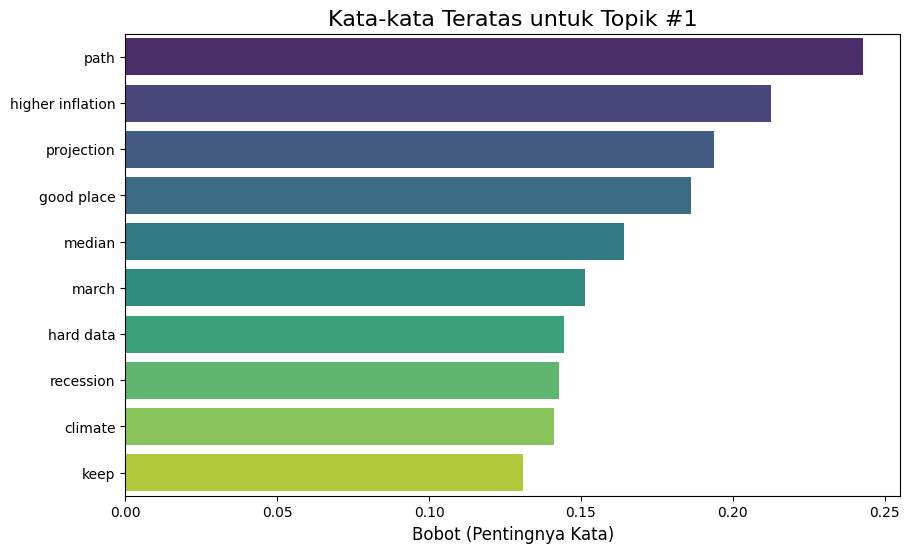

In [116]:
# 3. Data Modeling

from sklearn.decomposition import NMF

def display_topics(model, feature_names, no_top_words):
    print("--- Topik yang Ditemukan Model NMF ---")
    for topic_idx, topic in enumerate(model.components_):
        # model.components_ adalah matriks H (Topic-Word)
        print(f"Topik #{topic_idx + 1}:")
        # Mengambil kata-kata paling penting (bobot tertinggi) untuk topik ini
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(" ".join(top_words))
        print("-" * 30)

# --- 2. Fungsi untuk Visualisasi Bar Chart ---
def plot_top_words(model, feature_names, topic_id, no_top_words):
    # Mengambil satu baris topik dari matriks H
    topic = model.components_[topic_id]

    # Mengambil kata dan bobot teratas
    top_words_indices = topic.argsort()[:-no_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]

    # Membuat plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_weights, y=top_words, palette="viridis")
    plt.title(f'Kata-kata Teratas untuk Topik #{topic_id + 1}', fontsize=16)
    plt.xlabel('Bobot (Pentingnya Kata)', fontsize=12)
    plt.show()

# 3. Inisialisasi dan Latih Model NMF

# Tentukan jumlah topik
n_topics = 3 # Disini pake 3

if 'X_tfidf' in locals():
    print(f"Melatih model NMF untuk menemukan {n_topics} topik...")

    # Inisialisasi model
    nmf_model = NMF(
        n_components=n_topics,
        random_state=42,
        max_iter=500
    )

    # Latih model pada data TF-IDF
    nmf_model.fit(X_tfidf)

    # Simpan matriks W (Document-Topic) untuk langkah PCA/t-SNE
    W_doc_topic = nmf_model.transform(X_tfidf)

    print("Pelatihan NMF Selesai.")

    # 4. Tampilkan Hasil
    no_top_words = 10
    display_topics(nmf_model, feature_names, no_top_words)

    print("\nVisualisasi Bar Chart untuk Topik #1:")
    plot_top_words(nmf_model, feature_names, topic_id=0, no_top_words=10)

else:
    print("ERROR: Variabel 'X_tfidf' atau 'feature_names' tidak ditemukan.")
    print("Harap jalankan sel '2. Data Text Processing' terlebih dahulu.")

--- Menjalankan PCA pada Matriks Dokumen-Topik (W) ---
DataFrame PCA siap:
        PC1       PC2  date
0 -0.090605  0.648386  0129
1 -0.249727 -0.075371  0319
2 -0.260427 -0.255894  0507
3 -0.116269 -0.240812  0618
4  0.717028 -0.076309  0730


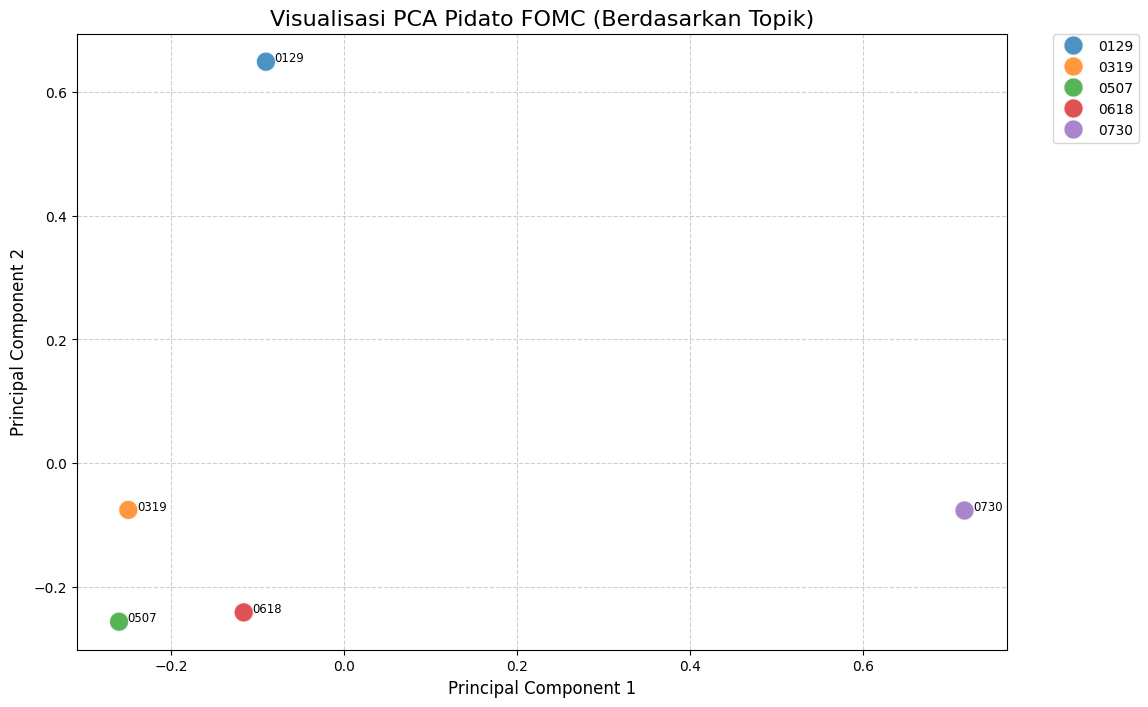

In [117]:
# 4. Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan
from sklearn.decomposition import PCA

if 'W_doc_topic' in locals() and 'df' in locals():
    print("--- Menjalankan PCA pada Matriks Dokumen-Topik (W) ---")

    # 1. Inisialisasi PCA
    pca = PCA(n_components=2, random_state=42)

    # 2. Latih PCA pada matriks W (Document-Topic)
    pca_components = pca.fit_transform(W_doc_topic)

    # 3. Buat DataFrame
    pca_df = pd.DataFrame(
        data=pca_components,
        columns=['PC1', 'PC2']
    )
    pca_df['date'] = df['date'].reset_index(drop=True)

    print("DataFrame PCA siap:")
    print(pca_df.head())

    # 4. Visualisasi menggunakan Scatter slot mahjong
    plt.figure(figsize=(12, 8))

    # Gunakan seaborn
    scatter = sns.scatterplot(
        x='PC1',
        y='PC2',
        hue='date',
        data=pca_df,
        s=200,
        alpha=0.8
    )

    # Tambahkan label untuk setiap titik
    for line in range(0, pca_df.shape[0]):
         scatter.text(
             pca_df['PC1'][line] + 0.01,
             pca_df['PC2'][line],
             pca_df['date'][line],
             horizontalalignment='left',
             size='small',
             color='black'
         )

    plt.title('Visualisasi PCA Pidato FOMC (Berdasarkan Topik)', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

else:
    print("ERROR: ")